# Titanic Data Analysis with Pandas

In this notebook, we will perform several data analysis operations using the Titanic dataset. We will use the Pandas library to manipulate and analyze the data.

Titanic Dataset: https://www.kaggle.com/c/titanic/data

The main columns are:
- PassengerId: Unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or not (0).
- Pclass: Passenger class (1 = First, 2 = Second, 3 = Third).
- Name: Passenger's name
- Sex: Passenger's sex
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Ticket: Ticket number
- Fare: Ticket fare
- Cabin: Cabin number
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [17]:
import pandas as pd
from pandas import pivot_table
import matplotlib.pyplot as plt


## Slicing and Subsets

Create two new DataFrames from the original `df_titanic` DataFrame:

1. `df_id`: containing only the columns `PassengerId` and `Name`.
2. `df_var_number`: containing only the columns `Age` and `Fare`.

In [3]:
df_titanic = pd.read_csv('titanic.csv')
print(df_titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df_id = df_titanic[['PassengerId', 'Name']]
print(df_id.head())

   PassengerId                                               Name
0            1                            Braund, Mr. Owen Harris
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...
2            3                             Heikkinen, Miss. Laina
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4            5                           Allen, Mr. William Henry


In [5]:
df_var_number = df_titanic[['Age', 'Fare']]
print(df_var_number.head())

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


## Grouping and Aggregation
Average age and maximum fare by sex.

In [7]:
df_avg_age_fare = df_titanic.groupby('Sex')[['Age', 'Fare']].agg({
    'Age': 'mean',
    'Fare': 'max'
}).round(2)

print(df_avg_age_fare.head())

          Age    Fare
Sex                  
female  27.92  512.33
male    30.73  512.33


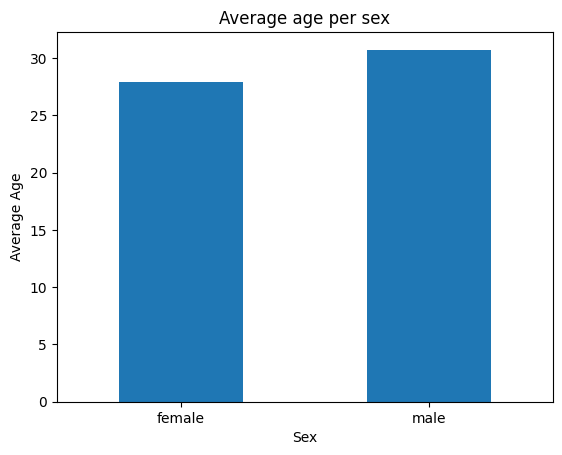

In [22]:
df_avg_age_fare['Age'].plot(kind='bar')
plt.ylabel('Average Age')
plt.title('Average age per sex')
plt.xticks(rotation=0)
plt.show()


## Data Reshaping (Pivot)
Average survivors by class and port of embarkation.

Pandas pivot_table allows you to reorganize the data to facilitate analysis.

In [15]:
df_avg_passenger_survival_by_class = df_titanic.pivot_table(
    values='Survived',
    index=['Pclass', 'Embarked'],
    aggfunc='mean',
    fill_value=0
).round(2)

print(df_avg_passenger_survival_by_class.head())

                 Survived
Pclass Embarked          
1      C             0.69
       Q             0.50
       S             0.58
2      C             0.53
       Q             0.67


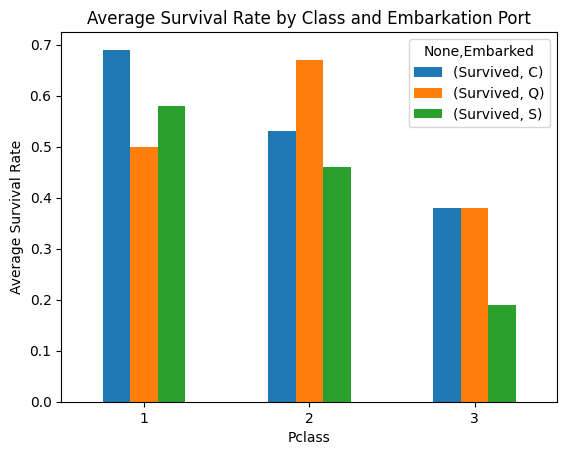

In [23]:
df_avg_passenger_survival_by_class.unstack().plot(kind='bar')
plt.ylabel('Average Survival Rate')
plt.title('Average Survival Rate by Class and Embarkation Port')
plt.xticks(rotation=0)
plt.show()

The unstack() method in Pandas transforms a row index into columns. In the example, it converts the multi-index (Pclass, Embarked) into columns, making it easier to visualize grouped data in a bar chart.
